# LSTM神经网络风格动量策略

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import keras as kr
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers.recurrent import LSTM,GRU
import matplotlib.ticker as ticker
import h5py

Using TensorFlow backend.
D:\softwares\Anaconda\envs\kr\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\softwares\Anaconda\envs\kr\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\softwares\Anaconda\envs\kr\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\softwares\Anaconda\envs\kr\lib\site-packages\tensorflow\python

## （1）获取数据，分割为三个数据集

In [2]:
data = pd.read_csv("LSTM_data/j_12_return.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
union = pd.read_csv("trade_data/union.csv")

In [3]:
data.insert(0,"week_date",union.trade_date.tolist()[60:1204])

In [4]:
train_data = data[:884]
find_data = data[884:1040]
test_data = data[884:]

## （2）将输入数据转换成（n,1,12）的形式，输出数据转换成（n,1,1）热编码的形式

In [5]:
# train_data
x_train = np.zeros((1700,1,12))
y_train = np.zeros((1700,1))
for i in range(25):
    temp = train_data["p"+str(i+1)].tolist()
    for j in range(len(temp)//13):
        x_train[i*68+j]=temp[j*13:j*13+12]
        y_train[i*68+j]= 0 if temp[j*13+12]<0.0 or temp[j*13+12]==0.0 else 1




In [6]:
# test_data
x_test = np.zeros((500,1,12))
y_test = np.zeros((500,1))
for i in range(25):
    temp = test_data["p"+str(i+1)].tolist()
    for j in range(len(temp)//13):
        x_test[i*20+j]=temp[j*13:j*13+12]
        y_test[i*20+j]= 0 if temp[j*13+12]<0.0 or temp[j*13+12]==0.0 else 1

In [8]:
#写一个LossHistory类，保存loss和acc
class LossHistory(kr.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        #self.val_loss = {'batch':[], 'epoch':[]}
        #self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('binary_accuracy'))
        #self.val_loss['batch'].append(logs.get('val_loss'))
        #self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('binary_accuracy'))
        #self.val_loss['epoch'].append(logs.get('val_loss'))
        #self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        #if loss_type == 'epoch':
            ## val_acc
            #plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            ## val_loss
            #plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

## tets

In [9]:
history = LossHistory()
model = Sequential([
    Dense(50, input_shape = (1,12),activation = "sigmoid"),
    Dropout(0.1),
    GRU(52),
    Dropout(0.1),
    Dense(50,activation = "sigmoid"),
    Dropout(0.1),
    Dense(1,activation = "sigmoid")
    ])

model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["binary_accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.fit(x_train,y_train,epochs = 100,callbacks=[history],batch_size=68)
history.loss_plot('epoch')

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1700/1700 [==============================] - 1s 550us/step - loss: 0.7020 - binary_accuracy: 0.5165
Epoch 2/100
1700/1700 [==============================] - 0s 66us/step - loss: 0.6956 - binary_accuracy: 0.5359
Epoch 3/100
1700/1700 [==============================] - 0s 69us/step - loss: 0.6994 - binary_accuracy: 0.5118
Epoch 4/100
1700/1700 [==============================] - 0s 63us/step - loss: 0.7043 - binary_accuracy: 0.5141
Epoch 5/100
1700/1700 [==============================] - 0s 62us/step - loss: 0.6920 - binary_accuracy: 0.5365
Epoch 6/100
1700/1700 [==============================] - 0s 66us/step - loss: 0.6979 - binary_accuracy: 0.5347
Epoch 7/100
1700/1700 [==============================] - 0s 65us/step - loss: 0.6939 - binary_accuracy: 0.5212
Epoch 8/100
1700/1700 [==============================] - 0s 66us/step - loss: 0.6935 - binary_accuracy: 0.5406
Epoch 9/100
1700/1700 [==============================] - 0s 65u

1700/1700 [==============================] - 0s 63us/step - loss: 0.6555 - binary_accuracy: 0.6094
Epoch 72/100
1700/1700 [==============================] - 0s 81us/step - loss: 0.6525 - binary_accuracy: 0.6141
Epoch 73/100
1700/1700 [==============================] - 0s 83us/step - loss: 0.6554 - binary_accuracy: 0.6006
Epoch 74/100
1700/1700 [==============================] - 0s 85us/step - loss: 0.6562 - binary_accuracy: 0.6018
Epoch 75/100
1700/1700 [==============================] - 0s 88us/step - loss: 0.6642 - binary_accuracy: 0.6006
Epoch 76/100
1700/1700 [==============================] - 0s 83us/step - loss: 0.6547 - binary_accuracy: 0.6200
Epoch 77/100
1700/1700 [==============================] - 0s 61us/step - loss: 0.6502 - binary_accuracy: 0.6171
Epoch 78/100
1700/1700 [==============================] - 0s 62us/step - loss: 0.6554 - binary_accuracy: 0.6147
Epoch 79/100
1700/1700 [==============================] - 0s 64us/step - loss: 0.6570 - binary_accuracy: 0.6159
Epoch

In [26]:
model.save("model.h5")

In [11]:
model.evaluate(x_test,y_test)

500/500 [==============================] - 0s 318us/step


[0.6665899658203125, 0.6620000004768372]

In [12]:
y_predict = model.predict(x_test)

In [13]:
label = y_predict - 0.5

In [14]:
ls = list(range(20))
df = pd.DataFrame({"order":ls})
for i in range(25):
    df["p"+str(i+1)] = label[i*20:i*20+20]

In [15]:
df.drop("order",axis=1,inplace=True)

In [16]:
# train_data
#x_test = np.zeros((500,1,12))
df_test = np.zeros((500,1))
for i in range(25):
    temp = test_data["p"+str(i+1)].tolist()
    for j in range(len(temp)//13):
        #x_test[i*20+j]=temp[j*13:j*13+12]
        df_test[i*20+j]=temp[j*13+12]

In [17]:
ls = list(range(20))
test = pd.DataFrame({"order":ls})
for i in range(25):
    test["p"+str(i+1)] = df_test[i*20:i*20+20]

In [18]:
test

,order,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25
0,0,0.012835,-0.004076,0.010624,0.010518,0.015788,0.012835,-0.003476,-0.001465,0.003441,...,0.002047,0.006741,0.013965,0.009565,0.002459,0.009600,-0.012759,-0.018212,-0.003218,0.011318
1,1,-0.000465,0.028306,0.014818,0.010918,0.025212,0.049071,0.023953,0.037541,0.021647,...,0.031276,0.029153,0.052500,0.035482,0.020012,0.023776,0.015453,0.029653,0.025241,0.048106
2,2,0.011935,0.019047,0.017365,0.013212,0.012247,0.009782,0.000035,-0.023665,-0.019065,...,0.015447,-0.020594,-0.014753,-0.026788,-0.010071,0.007318,-0.015453,-0.021453,-0.023029,-0.035906
3,3,0.046229,0.073359,0.034329,0.023965,0.051171,0.036494,0.038341,0.036000,0.032229,...,0.040482,0.065718,0.054865,0.048988,0.036047,0.028435,0.043800,0.047600,0.052053,0.043724
4,4,0.039976,0.054759,0.041088,0.053035,0.065518,0.022865,0.082176,0.035441,0.083835,...,0.033953,0.052424,0.082524,0.114700,0.130588,0.064006,0.052218,0.099847,0.104865,0.060935
5,5,0.108629,0.072400,0.131435,0.101453,0.080553,0.144859,0.124876,0.108059,0.066994,...,0.128894,0.113388,0.146465,0.152512,0.096629,0.113482,0.099147,0.131565,0.088724,0.150776
6,6,-0.000906,0.001559,0.005506,0.005159,0.013300,-0.002565,-0.002506,0.027976,0.032500,...,0.007976,0.001506,-0.002965,0.028276,0.044112,0.003471,0.005024,0.016229,0.061724,0.015665
7,7,0.031259,0.029376,0.055476,0.059929,0.048700,0.087247,0.060182,0.065100,0.083300,...,0.047629,0.059276,0.083247,0.064894,0.087076,0.027976,0.058576,0.063124,0.058182,0.064394
8,8,-0.011906,0.010547,0.008041,-0.000671,-0.014859,0.009200,-0.006876,0.003665,-0.009547,...,-0.008271,-0.003318,0.001600,-0.026012,0.009924,-0.004394,-0.019453,-0.026441,-0.013559,-0.000476
9,9,0.029494,0.069494,0.036224,0.031918,0.063729,0.037418,0.035418,0.042312,0.024953,...,0.037106,0.025606,0.049576,0.038600,0.020800,0.027241,0.036424,0.059418,0.032682,0.027259


In [19]:
test.drop("order",axis=1,inplace=True)

In [20]:
rate = []
for i in range(20):
    row = df.loc[i].tolist()
    temp = []
    for k in range(5):
        if max(row)>0:
            large = row.index(max(row))
            temp.append(large)
            row[row.index(max(row))] = -1
        else:
            break
    average = 0.0
    for j in temp:
        average += test.loc[i].tolist()[j]
    if len(temp)==0:
        continue
    else:
        average /= len(temp)
        rate.append(average)

In [21]:
rate

[0.0012964705882352943,
 0.015583529411764708,
 -0.00218235294117647,
 0.05046941176470589,
 0.0688894117647059,
 0.13089764705882354,
 0.010203529411764705,
 0.08707647058823527,
 0.0048058823529411755,
 0.040827058823529404,
 0.006547058823529411,
 0.017225882352941174,
 -0.022996470588235292,
 -0.004488235294117647,
 0.007543529411764706,
 -0.04423676470588235,
 -0.019941176470588243,
 0.04397529411764706]

In [22]:
ls = rate
order = range(len(ls))
for i in order[1:]:
    ls[i] = (ls[i]+1)*(ls[i-1]+1)-1

In [23]:
ls[-1]

0.45194190574540305

In [24]:
np.power(0.3569+1,0.05)-1

0.01537716470007755

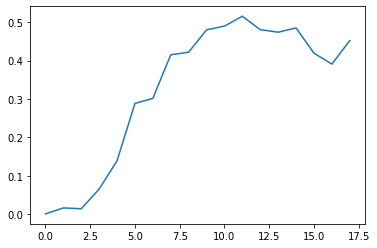

In [25]:
x = list(range(len(ls)))
plt.plot(ls)

# 增大数据集尝试

## 每一周都根据过去12周的收益率选择新的赢家组合

In [150]:
import json

In [221]:
union = pd.read_csv("trade_data/union.csv")
total_map = json.load(open('total_map/total_map.txt','r'))
#生成表，并得到列名
day_map = total_map.get(str(union.season[125]))
column = list(day_map.keys())
column.append("week_date")
j_return = pd.DataFrame(columns = column)
k_period = list(range(len(union)))
k_period = k_period[72:]

In [218]:
union.trade_date[72:97]

72    19961004
73    19961011
74    19961018
75    19961025
76    19961101
77    19961108
78    19961115
79    19961122
80    19961129
81    19961206
82    19961213
83    19961220
84    19961227
85    19970103
86    19970110
87    19970117
88    19970124
89    19970131
90    19970221
91    19970228
92    19970307
93    19970314
94    19970321
95    19970328
96    19970404
Name: trade_date, dtype: int64

In [222]:
for i in k_period:
    j_rate_ls = []
    j2_rate_ls = []
    j3_rate_ls = []
    j4_rate_ls = []
    j5_rate_ls = []
    j6_rate_ls = []
    j7_rate_ls = []
    j8_rate_ls = []
    j9_rate_ls = []
    j10_rate_ls = []
    j11_rate_ls = []
    j12_rate_ls = []
    k_rate_ls = []
    day_map = total_map.get(str(union.season[i]))
    for j in range(25):
        key = "p"+str(j+1)
        port = day_map.get(key)
        j_rate,j2_rate,j3_rate,j4_rate,j5_rate,j6_rate,j7_rate,j8_rate,j9_rate,j10_rate,j11_rate,j12_rate,k_rate = 0,0,0,0,0,0,0,0,0,0,0,0,0
        for p in port:
            j_rate += union[p][i-1]
            j2_rate += union[p][i-2]
            j3_rate += union[p][i-3]
            j4_rate += union[p][i-4]
            j5_rate += union[p][i-5]
            j6_rate += union[p][i-6]
            j7_rate += union[p][i-7]
            j8_rate += union[p][i-8]
            j9_rate += union[p][i-9]
            j10_rate += union[p][i-10]
            j11_rate += union[p][i-11]
            j12_rate += union[p][i-12]
            k_rate += union[p][i]                
        j_rate /= len(port)
        j2_rate /= len(port)
        j3_rate /= len(port)
        j4_rate /= len(port)
        j5_rate /= len(port)
        j6_rate /= len(port)
        j7_rate /= len(port)
        j8_rate /= len(port)
        j9_rate /= len(port)
        j10_rate /= len(port)
        j11_rate /= len(port)
        j12_rate /= len(port)
        k_rate /= len(port)
        
        j_rate_ls.append(j_rate)
        j2_rate_ls.append(j2_rate)
        j3_rate_ls.append(j3_rate)
        j4_rate_ls.append(j4_rate)
        j5_rate_ls.append(j5_rate)
        j6_rate_ls.append(j6_rate)
        j7_rate_ls.append(j7_rate)
        j8_rate_ls.append(j8_rate)
        j9_rate_ls.append(j9_rate)
        j10_rate_ls.append(j10_rate)
        j11_rate_ls.append(j11_rate)
        j12_rate_ls.append(j12_rate)
        k_rate_ls.append(k_rate)
    j_rate_ls.append("0")
    j2_rate_ls.append("0")
    j3_rate_ls.append("0")
    j4_rate_ls.append("0")
    j5_rate_ls.append("0")
    j6_rate_ls.append("0")
    j7_rate_ls.append("0")
    j8_rate_ls.append("0")
    j9_rate_ls.append("0")
    j10_rate_ls.append("0")
    j11_rate_ls.append("0")
    j12_rate_ls.append("0")
    k_rate_ls.append(union.trade_date[i])
            
    j_return.loc[len(j_return)]=j12_rate_ls
    j_return.loc[len(j_return)]=j11_rate_ls
    j_return.loc[len(j_return)]=j10_rate_ls
    j_return.loc[len(j_return)]=j9_rate_ls
    j_return.loc[len(j_return)]=j8_rate_ls
    j_return.loc[len(j_return)]=j7_rate_ls
    j_return.loc[len(j_return)]=j6_rate_ls
    j_return.loc[len(j_return)]=j5_rate_ls
    j_return.loc[len(j_return)]=j4_rate_ls
    j_return.loc[len(j_return)]=j3_rate_ls
    j_return.loc[len(j_return)]=j2_rate_ls
    j_return.loc[len(j_return)]=j_rate_ls
    j_return.loc[len(j_return)]=k_rate_ls
    print(i,end="  ")
    print(k_rate_ls[-1])
j_return.to_csv("LSTM_data/j_return.csv")
print("LSTM/j_return.csv")

72  19961004
73  19961011
74  19961018
75  19961025
76  19961101
77  19961108
78  19961115
79  19961122
80  19961129
81  19961206
82  19961213
83  19961220
84  19961227
85  19970103
86  19970110
87  19970117
88  19970124
89  19970131
90  19970221
91  19970228
92  19970307
93  19970314
94  19970321
95  19970328
96  19970404
97  19970411
98  19970418
99  19970425
100  19970430
101  19970509
102  19970516
103  19970523
104  19970530
105  19970606
106  19970613
107  19970620
108  19970627
109  19970704
110  19970711
111  19970718
112  19970725
113  19970801
114  19970808
115  19970815
116  19970822
117  19970829
118  19970905
119  19970912
120  19970919
121  19970926
122  19970930
123  19971010
124  19971017
125  19971024
126  19971031
127  19971107
128  19971114
129  19971121
130  19971128
131  19971205
132  19971212
133  19971219
134  19971226
135  19971231
136  19980109
137  19980116
138  19980123
139  19980213
140  19980220
141  19980227
142  19980306
143  19980313
144  19980320
145  1

660  20080725
661  20080801
662  20080808
663  20080815
664  20080822
665  20080829
666  20080905
667  20080912
668  20080919
669  20080926
670  20081010
671  20081017
672  20081024
673  20081031
674  20081107
675  20081114
676  20081121
677  20081128
678  20081205
679  20081212
680  20081219
681  20081226
682  20081231
683  20090109
684  20090116
685  20090123
686  20090206
687  20090213
688  20090220
689  20090227
690  20090306
691  20090313
692  20090320
693  20090327
694  20090403
695  20090410
696  20090417
697  20090424
698  20090430
699  20090508
700  20090515
701  20090522
702  20090527
703  20090605
704  20090612
705  20090619
706  20090626
707  20090703
708  20090710
709  20090717
710  20090724
711  20090731
712  20090807
713  20090814
714  20090821
715  20090828
716  20090904
717  20090911
718  20090918
719  20090925
720  20090930
721  20091009
722  20091016
723  20091023
724  20091030
725  20091106
726  20091113
727  20091120
728  20091127
729  20091204
730  20091211
731  2

In [69]:
j_return=pd.read_csv("LSTM_data/j_return.csv")

In [82]:
j_return

,Unnamed: 0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p17,p18,p19,p20,p21,p22,p23,p24,p25,week_date
0,0,0.015629,-0.000941,-0.005018,0.006453,-0.001788,0.084200,0.007906,0.014400,-0.004100,...,0.084835,0.058359,0.042406,0.093953,0.031982,0.030671,0.022671,-0.001424,0.010876,0.0
1,1,0.028565,0.002112,0.004306,0.056418,0.003376,0.086988,0.047388,0.008494,0.001282,...,0.159394,0.140406,0.150788,0.136365,0.116682,0.112865,0.132035,0.148624,0.171241,0.0
2,2,0.005565,-0.001241,0.015524,-0.002247,-0.003512,-0.018600,-0.007500,-0.004324,-0.000394,...,-0.014618,-0.028241,-0.017665,-0.006776,0.011718,-0.008894,-0.010647,-0.037765,-0.057782,0.0
3,3,0.007482,-0.003782,0.007271,0.001400,-0.003394,-0.002865,0.000047,-0.006429,-0.001659,...,0.006694,0.023176,0.002635,0.000782,-0.033929,0.005094,-0.004994,-0.004506,0.012053,0.0
4,4,0.037447,0.003053,0.025900,0.014641,0.021147,0.045724,0.016818,0.002047,0.001300,...,0.036047,0.032588,0.053441,0.033159,0.031206,0.037294,0.026135,0.039094,0.045406,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14802,14802,0.061306,0.084406,0.077494,0.067600,0.055912,0.078059,0.098029,0.059682,0.063135,...,0.067241,0.088847,0.051571,0.071247,0.062400,0.045612,0.070829,0.062676,0.033141,0.0
14803,14803,-0.021035,-0.021012,-0.019500,-0.011412,0.001506,-0.013553,-0.012953,-0.026059,-0.003188,...,-0.019665,-0.024588,-0.005994,-0.002335,-0.001165,-0.014535,-0.017853,-0.019865,0.011429,0.0
14804,14804,0.016306,0.008171,0.012982,0.021218,-0.000094,-0.012647,0.022476,0.056629,0.039318,...,0.012100,0.031488,0.023176,0.003406,-0.005600,0.005635,0.022547,0.007924,0.020235,0.0
14805,14805,-0.097335,-0.089547,-0.068200,-0.057735,-0.057176,-0.072571,-0.080482,-0.097806,-0.090047,...,-0.080624,-0.052229,-0.072782,-0.103224,-0.070541,-0.080788,-0.077829,-0.090029,-0.139047,0.0


In [221]:
train_data = j_return[:11479]
# train_data
x_train = np.zeros((22075,1,12))
y_train = np.zeros((22075,1))
y_label = np.zeros((22075,1))
for i in range(25):
    temp = train_data["p"+str(i+1)].tolist()
    for j in range(len(temp)//13):
        x_train[i*883+j]=temp[j*13:j*13+12]
        y_label[i*883+j]= 0 if temp[j*13+12]<0.0 or temp[j*13+12]==0.0 else 1
        y_train[i*883+j]= temp[j*13+12]


In [226]:
test_data = j_return[11479:]
# train_data
x_test = np.zeros((6400,1,12))
y_test = np.zeros((6400,1))
y_label = np.zeros((6400,1))
for i in range(25):
    temp = test_data["p"+str(i+1)].tolist()
    for j in range(len(temp)//13):
        x_test[i*256+j]=temp[j*13:j*13+12]
        y_label[i*256+j]= 0 if temp[j*13+12]<0.0 or temp[j*13+12]==0.0 else 1
        y_test [i*256+j]= temp[j*13+12]



In [37]:
#写一个LossHistory类，保存loss和acc
class LossHistory(kr.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        #self.val_loss = {'batch':[], 'epoch':[]}
        #self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('binary_accuracy'))
        #self.val_loss['batch'].append(logs.get('val_loss'))
        #self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('binary_accuracy'))
        #self.val_loss['epoch'].append(logs.get('val_loss'))
        #self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        #if loss_type == 'epoch':
            ## val_acc
            #plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            ## val_loss
            #plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [191]:
history = LossHistory()
model = Sequential([
    Dense(48, input_shape = (1,12),activation = "sigmoid"),
    LSTM(12),
    Dense(48,activation = "sigmoid"),
    Dense(1,activation = "sigmoid")
    ])
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["binary_accuracy"])

In [192]:
model.fit(x_train,
          y_train,
          epochs=100,
          callbacks=[history]
         )

Epoch 1/100
22075/22075 [==============================] - 2s 112us/step - loss: 0.6941 - binary_accuracy: 0.5315
Epoch 2/100
22075/22075 [==============================] - 2s 83us/step - loss: 0.6915 - binary_accuracy: 0.5321
Epoch 3/100
22075/22075 [==============================] - 2s 88us/step - loss: 0.6885 - binary_accuracy: 0.5414
Epoch 4/100
22075/22075 [==============================] - 2s 97us/step - loss: 0.6841 - binary_accuracy: 0.5505
Epoch 5/100
22075/22075 [==============================] - 2s 80us/step - loss: 0.6829 - binary_accuracy: 0.5501
Epoch 6/100
22075/22075 [==============================] - 2s 79us/step - loss: 0.6826 - binary_accuracy: 0.5534
Epoch 7/100
22075/22075 [==============================] - 2s 81us/step - loss: 0.6820 - binary_accuracy: 0.5564
Epoch 8/100
22075/22075 [==============================] - 2s 79us/step - loss: 0.6829 - binary_accuracy: 0.5537
Epoch 9/100
22075/22075 [==============================] - 2s 79us/step - loss: 0.6824 - binary

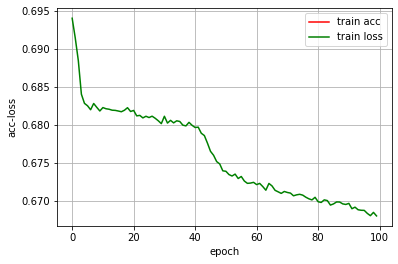

In [193]:
history.loss_plot('epoch')

In [222]:
model.evaluate(x_train,y_label)

22075/22075 [==============================] - 1s 31us/step


[0.6679484378684013, 0.5959683060646057]

In [223]:
y_pred = model.predict(x_train)

In [208]:
ls = list(range(883))
df_pred = pd.DataFrame({"order":ls})
for i in range(25):
    df_pred["p"+str(i+1)] =y_pred[i*883:i*883+883]
df_pred.drop("order",axis = 1,inplace = True)

In [228]:
ls = list(range(883))
df_test = pd.DataFrame({"order":ls})
for i in range(25):
    df_test["p"+str(i+1)] =y_train[i*883:i*883+883]
df_test.drop("order",axis = 1,inplace = True)

In [229]:
rate = []
for i in range(883):
    row = df_pred.loc[i].tolist()
    temp = []
    for k in range(5):
        if max(row)>0:
            large = row.index(max(row))
            temp.append(large)
            row[row.index(max(row))] = -1
        else:
            break
    average = 0.0
    for j in temp:
        average += df_test.loc[i].tolist()[j]
    if len(temp)==0:
        continue
    else:
        average /= len(temp)
        rate.append(average)

In [230]:
ls = rate
order = range(len(ls))
for i in order[1:]:
    ls[i] = (ls[i]+1)*(ls[i-1]+1)-1

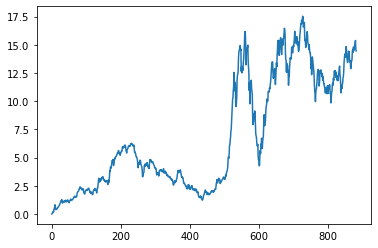

In [231]:
plt.plot(ls)

In [202]:
np.power(1.5259,25/7)-1

3.5232465518434104